# 复杂度分析

## 迭代与递归

### 迭代

In [13]:
# 迭代
def for_loop(n: int) -> int:
    result = 0
    for i in range(1, n + 1):
        result += i
    return result

for_loop(1024)

524800

### 递归

In [6]:
# 递归
# 递: 程序不断条用自身
# 归: 达到终止条件后, 归并所有操作
# 触发终止调节前, 存在n个未返回的递归函数, 递归深度为 n
def recur(n: int) -> int:
    if n == 1:
        return 1
    res = recur(n - 1)
    return n + res

recur(1024)

524800

迭代与递归和数学中的数列递推式关系极深  
a_1 = 1  
a_n = f[a_(n - 1)]  
迭代: 自下而上接近问题, 从 a_1 一步一步得到最终值  
递归: 自上而下解决问题, 从 a_n 开始, 按照递推式拆解(递), 拆解完毕后一次性求和(归)

由于 调用栈 的存在, 递归比迭代更加耗费资源, 无论是时间(调用操作)还是空间(调用栈)

### 尾递归

In [11]:
# 尾递归(tail recursion)
# 如果函数在 返回前最后一步 才进行递归调用, 则其可被编译器或解释器优化
# 避免了过多的调用栈
# 注: Python, Java不支持尾递归

# 在这里避免过多调用栈的方式是把加法操作放在了递的过程中
# 与循环类似, 只不过带着一个需要向下处理的未知量
def tail_recur(n):
    if n == 1:
        return 1
    return tail_recur(n - 1) + n
tail_recur(1024)

524800

### 递归树

In [17]:
# 分治: 大问题拆为多个小问题(分), 递归地解决小问题(治)
# 处理分治问题时, 递归比循环更加直观
# 普通递归是一条线, 递归树是一棵树

# 以斐波那契数列为例
# a_1 = 0
# a_2 = 1
# a_n = a_(n - 1) + a_(n - 2)

def fib(n: int) -> int:
    if n == 1:
        return 0
    if n == 2:
        return 1
    return fib(n - 1) + fib(n - 2)

fib(10)

34

很多情况下递归和迭代可以相互转换, 其关键就是在于是否有 自上而下 或 自下而上 的解决方法  
对于简单问题来说, 这两种方法都是很直观的, 但对于复杂问题, 通常只有一种方法易于得出.  
因此, 选择递归还是迭代取决于具体问题

## 时间复杂度

时间复杂度统计的是时间的增长趋势, 而非具体时间.  
其使得时间统计可以独立于平台和环境.  
但其存在一定的局限性, 即由于具体操作不同, 具体时间也不同.  
对于同样复杂度的算法, 或者数据量小时. 该比较方法无效. 需要实际运行来判断好坏.  
但由于其为增长趋势, 在数据量无穷大时, 更优的复杂度一定更好.

Big-O Notation 表示 渐进上界

记操作次数 T(n) = 3 + 2n (3次固定操作 + 2倍于n的操作)  
O(T(n)) = O(n)  

严格定义(下界则是把 <= 换为 >=):  
若存在正实数c和n_0, 使得对于所有的 n >= n_0, 有:  
    f(n) <= c * g(n)  
则称 f(n) = O(g(n)), g(n) 是 f(n) 的渐进上界

n_0 -> 起始点  

注: 只需记好 复杂度 = 趋势 即可!

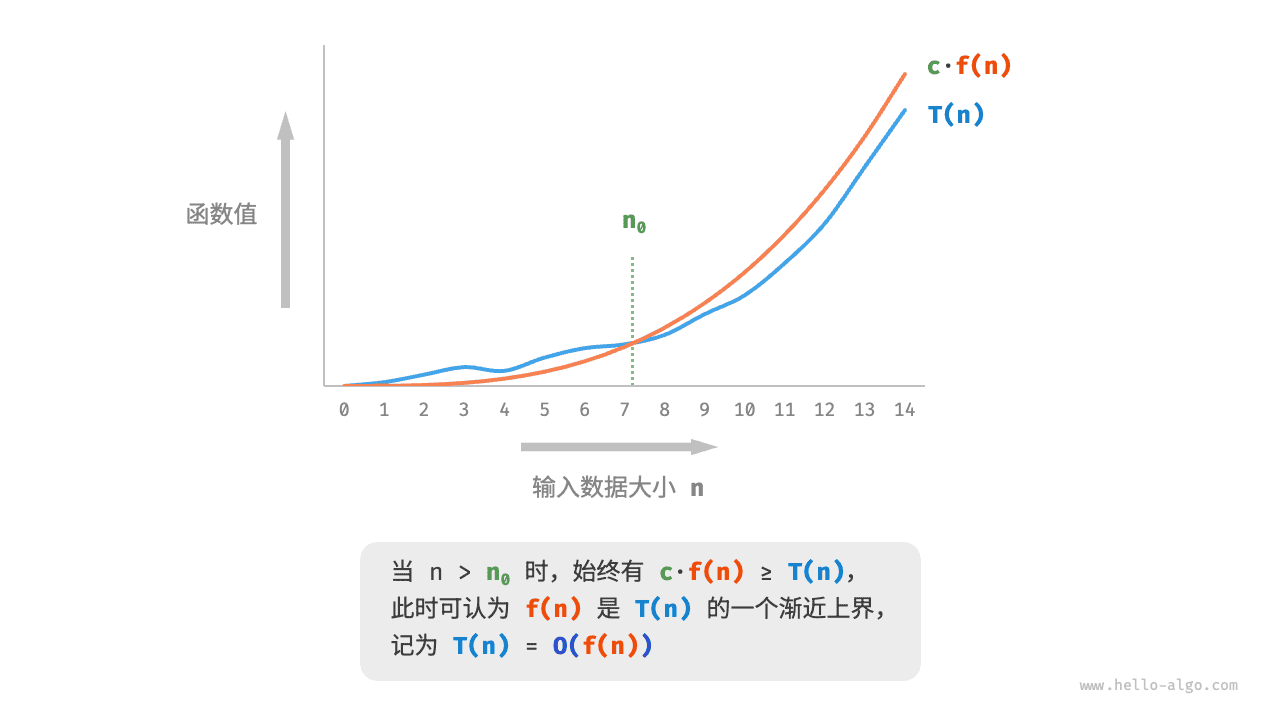

### 时间复杂度的推算方法

In [ ]:
# 由于常数项和系数以及低阶项不影响最终结果, 只需要找最高阶即可
# 一般高阶项在嵌套循环处
# 如这里为 O(n^2)
def algorithm(n: int):
    a = 1
    a = a + n
    
    for i in range(5 * n + 1):
        print(0)
        
    for i in range(2 * n):
        for j in range(n + 1):
            print(0)

常见复杂度类型  
实际就是无穷小的比较

常数阶 < 对数阶 < 线性阶 < 线性对数阶 < 平方阶 < 指数阶 < 阶乘阶  
O(1) < O(log n) < O(n) < O(nlog n) < O(n^2) < O(2^n) < O(n!)

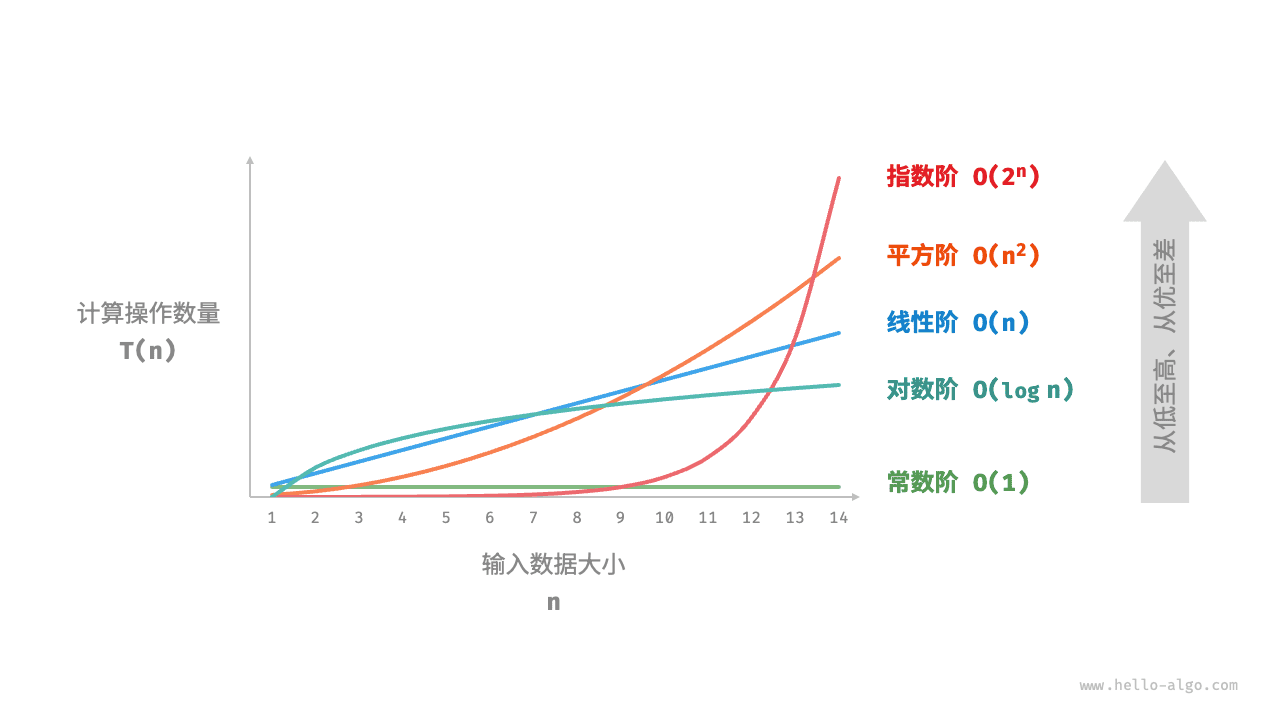

#### O(2^n)

O(2^n) 通常出现在递归树中, 类似于细胞分裂  
由于指数增长极快(指数爆炸), 对大规模问题是不可接受的

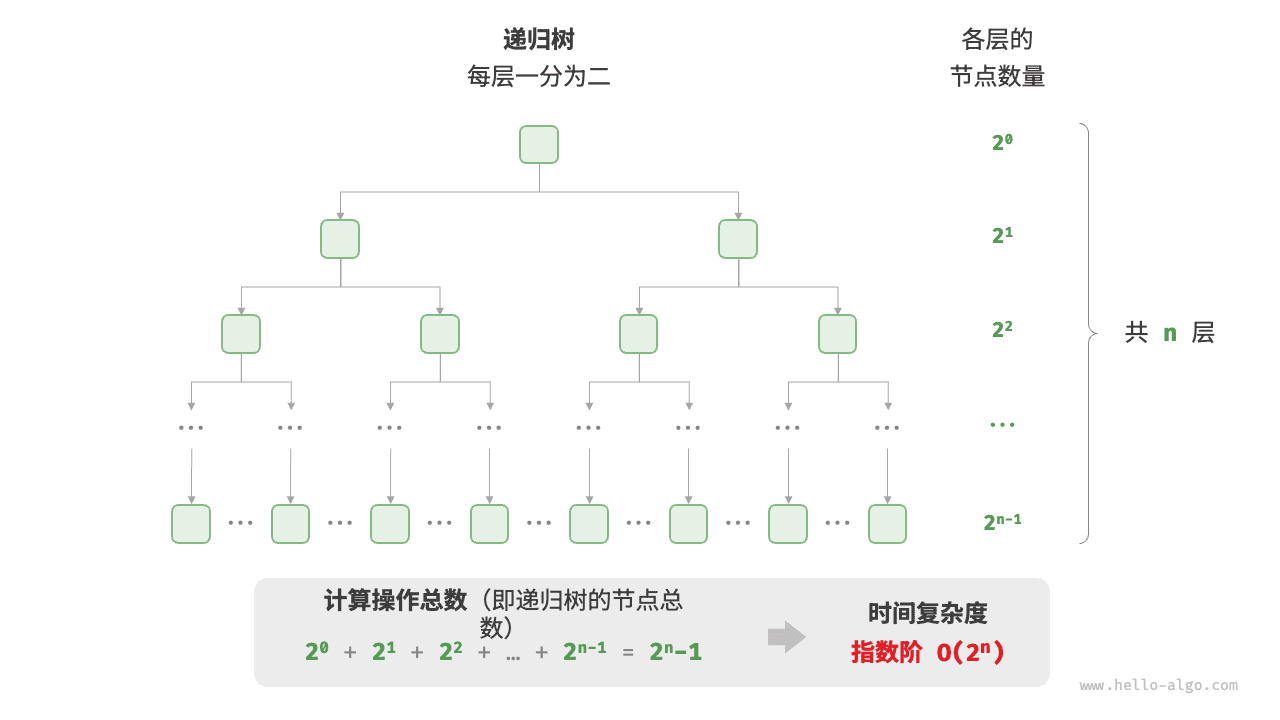

In [20]:
def fib(n: int) -> int:
    if n == 1:
        return 0
    if n == 2:
        return 1
    return fib(n - 1) + fib(n - 2)

fib(10)

34

#### O(log n)

对数阶 -> 每轮减半 -> 二分法  
常出现在分治策略中. 是仅次于常数阶的理想复杂度  

底数可以在不影响复杂度的前提下转换, 因此常常忽略底数  
O(log_m n) = O(log_k n / log_k m) = O(log_k n)
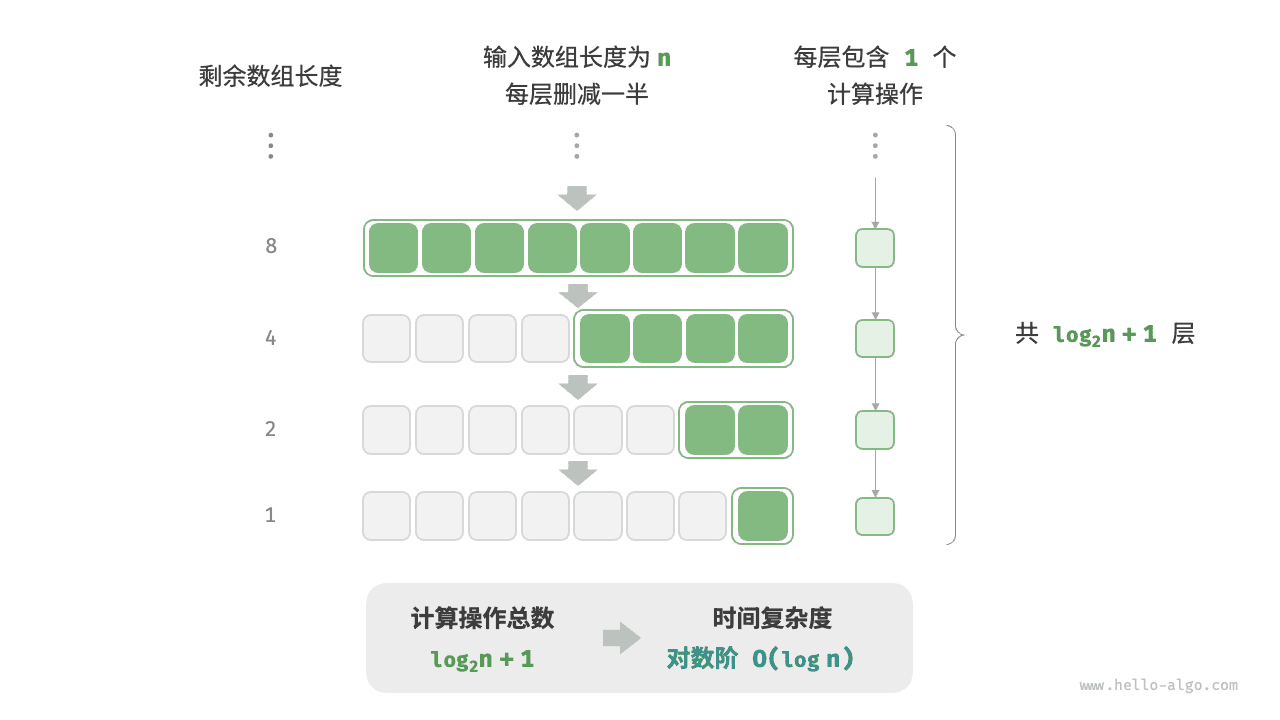

In [7]:
# 迭代
def logarithmic(n: int) -> int:
    count = 0
    while n > 1:
        n = n // 2
        count += 1
    return count

logarithmic(10)

3

In [5]:
# 递归
def log_recur(n: int) -> int:
    if n == 0:
        return -1
    return log_recur(n // 2) + 1

log_recur(10)

3

#### O(nlog n)

线性对数阶常出现于嵌套循环中, 两层循环的复杂度分别为 O(n) 和 O(log n)  
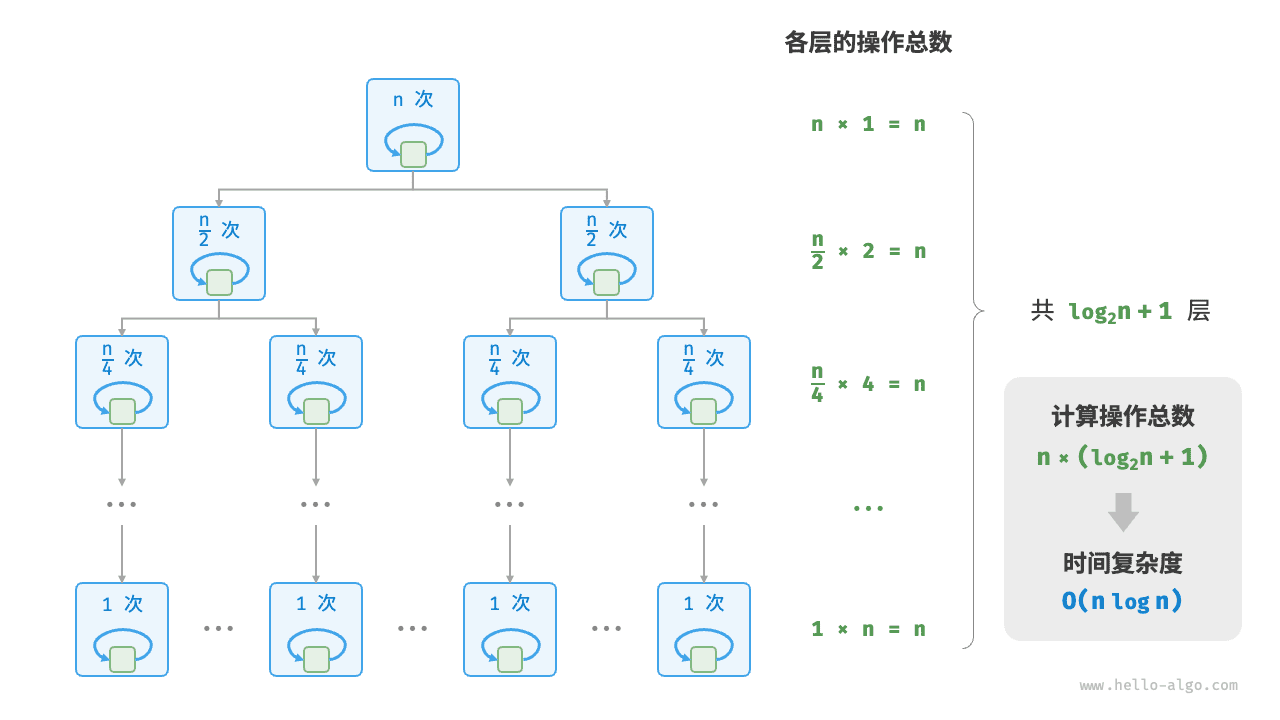

In [8]:
def linear_log(n: int) -> int:
    count = 0
    for i in range(n):
        tmp = n
        while tmp > 1:
            tmp //= 2
            count += 1
    return count

linear_log(10)

30

#### O(n!)

阶乘阶对应全排列问题, 通常使用递归实现  
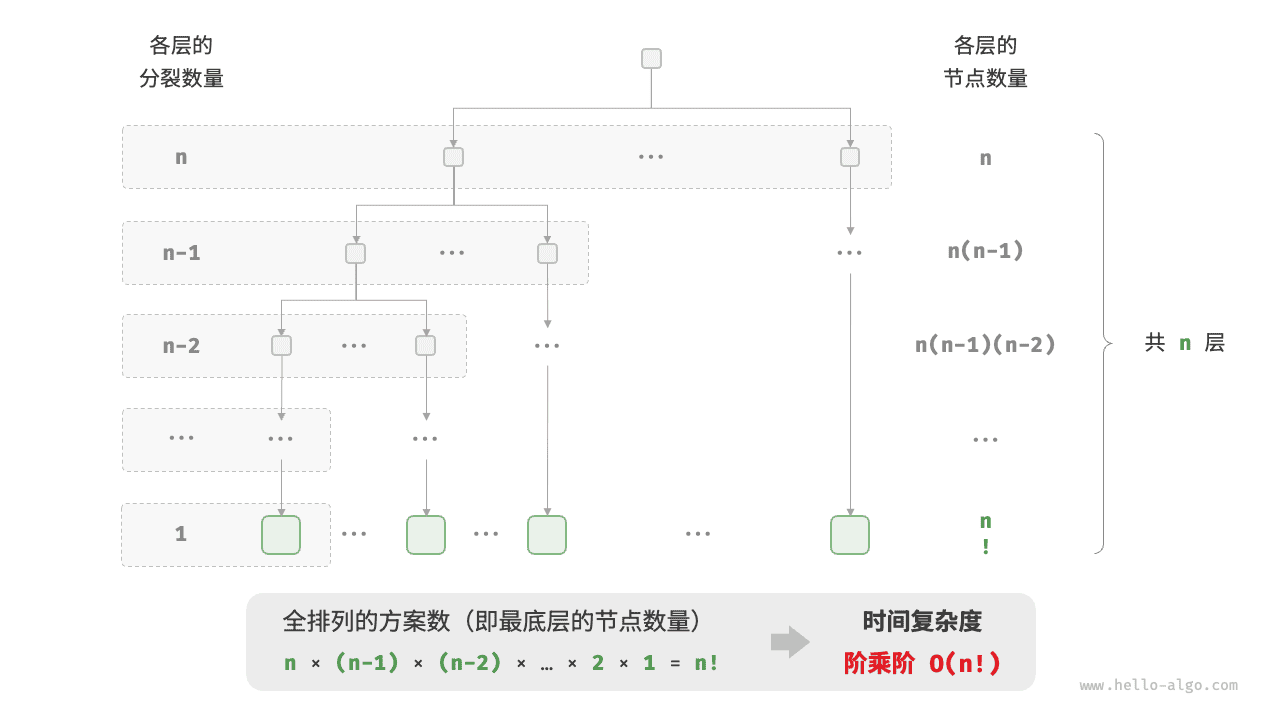

In [13]:
def factorial(n: int) -> int:
    if n == 1:
        return 1
    count = 0
    for _ in range(n):
        count += factorial(n - 1)
    return count

factorial_recur(10)

3628800

### 最差、最佳、平均时间复杂度

算法的时间效率不是固定的, 而是与输入数据的分布有关.  
假设在一个不重复的数组中寻找 1  

nums = [?, ?, ?, ?, 1] 时需要遍历整个数组, 达到最差时间复杂度 O(n)  
nums = [1, ?, ?, ?, ?] 时不需要遍历整个数组, 达到最佳时间复杂度 Ω(1) Omega  
nums = [1, ?, 1, ?, ?] 时需要遍历半个数组, 当输入数据均匀分布时, 达到平均复杂度 Θ(n / 2) = Θ(n) Theta  

虽然平均复杂度可以体现算法在随机输入下的运行效率, 但最差复杂度却更加常用:  
1. 最差复杂度给出了效率安全值
2. 对应复杂的算法平均复杂度难以计算

平均复杂度有时候也记作 O(n), 但这种写法不规范


## 空间复杂度

空间复杂度(space complexity) 用于衡量算法占用内存随数据量变化的变化趋势  

算法运行过程使用的空间包含三种:  
1. 输入空间
2. 暂存空间
3. 输出空间
一般情况下空间复杂度统计的范围是 暂存空间 和 输出空间

暂存空间可分为三部分:
1. 暂存数据
2. 栈帧空间

所以, 在分析空间复杂度时, 通常统计 暂存数据 栈帧空间 和 输出空间 三部分.  

由于内存为硬性要求, 需要保证在所有输入下都有足够的内存空间预留, 因此只统计最差情况.  

并且, 最差有两种含义:
1. 以最差输入数据为准
2. 以运行时峰值内存为准

递归需要注意栈帧空间, 如线性递归占用 O(n) 的栈帧空间

常见类型:  
O(1) < O(log n) < O(n) < O(n^2) < O(2^n)  
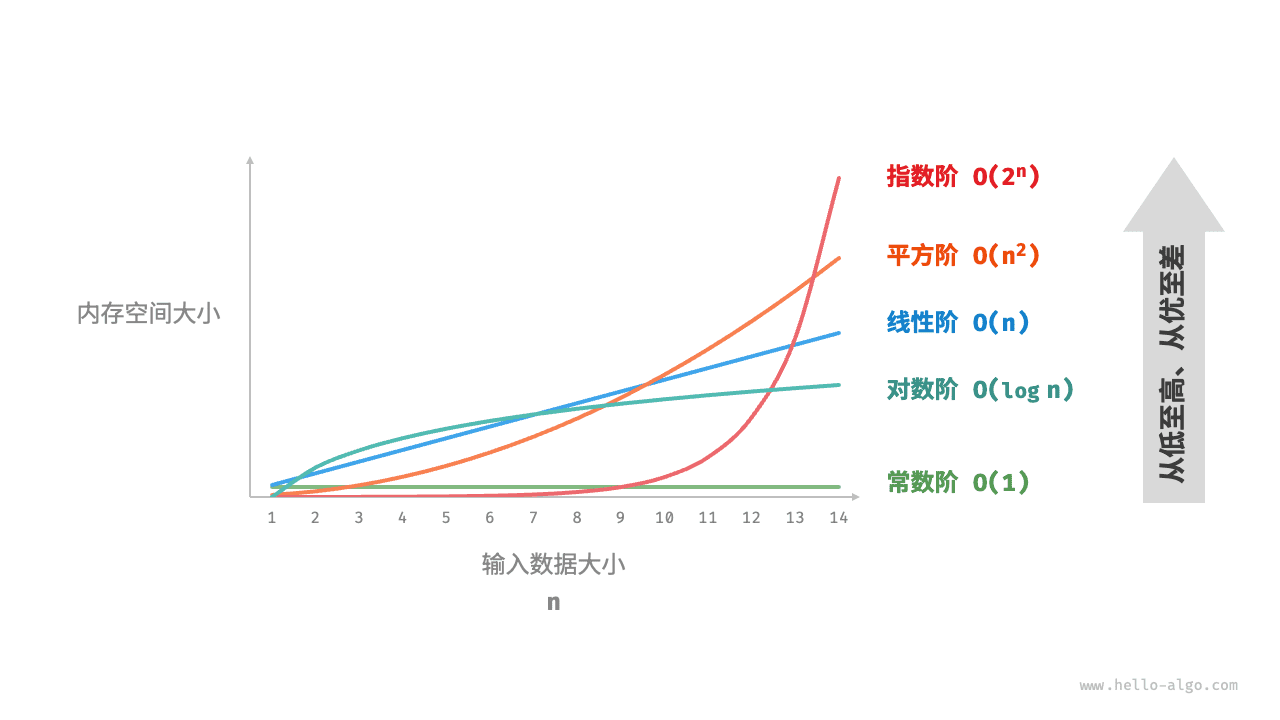

#### O(2^n)

常见于二叉树  
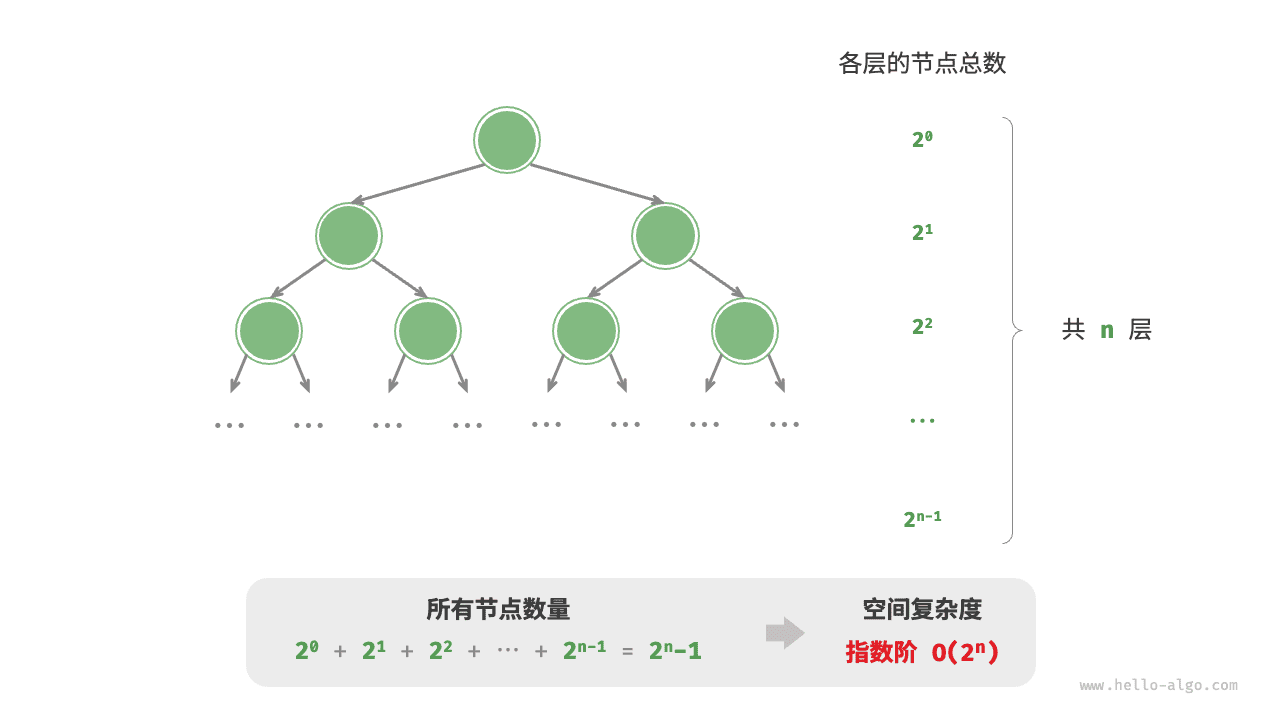

#### O(log n)

常见于分治算法, 形成高度为 log n 的递归树的栈帧空间

## 权衡时间与空间

理想条件下我们希望两者都达到最优, 但这种条件难以达到.  
时间复杂度和空间复杂度通常是成反比的, 因此需要根据具体问题来分析.  
通常情况下, 时间比空间更加宝贵.

# 数据结构

值得注意的是, 数据结构提供的是数据的组织方式

## 数据结构的分类

### 逻辑结构

逻辑结构分为两种:
1. 线性结构(一对一)
2. 非线性结构(一对多, 多对多)
非线性结构也分为两种:
1. 树形结构(一对一)
2. 网状结构(多对多)

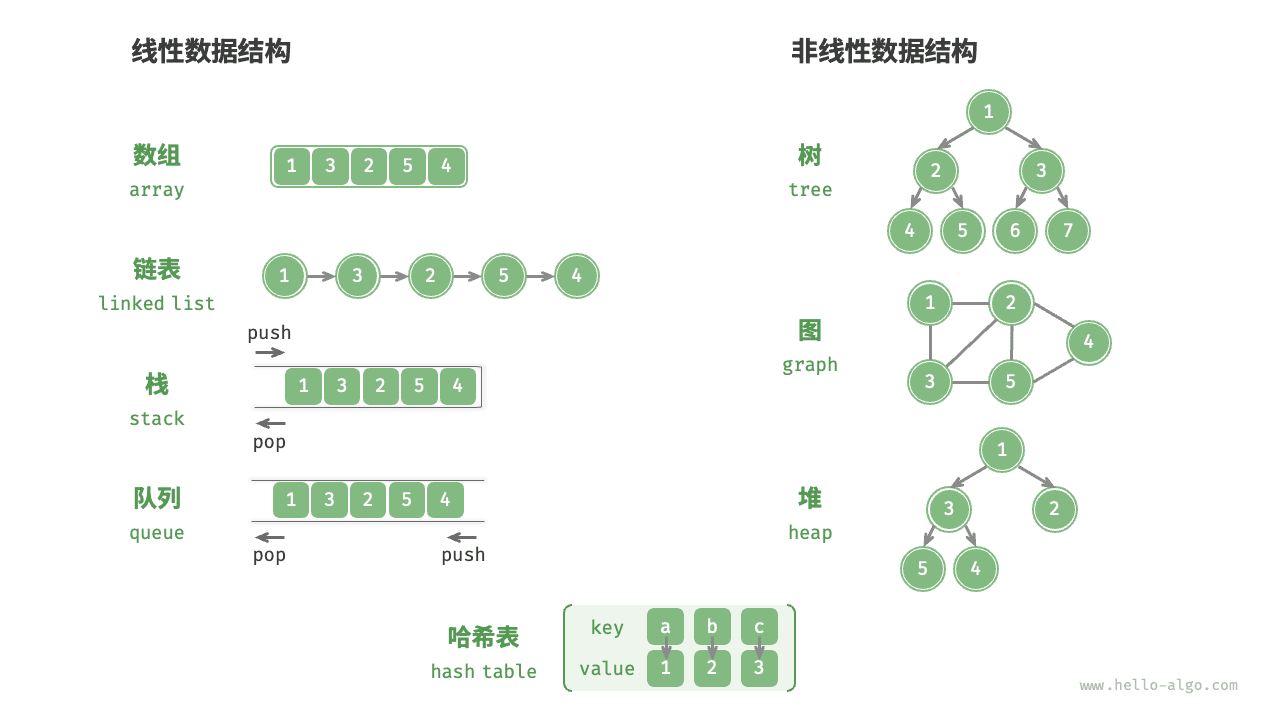

### 物理结构

物理结构反映了数据在内存中的存储方式
物理结构分为两种:
1. 连续空间存储(数组)
2. 离散空间存储(链表)

值得注意的是, 所有数据结构都是基于这两种结构实现的  
也就是所谓的 一生二, 二生三, 三生万物

## 数字编码

所有的整数类型能表示的负数都比正数多一个, 这是由于数字编码的原因  
数字编码共三种:
1. 原码: 将二进制最高位视为符号位(0表整数, 1表负数), 其余位表数值
2. 反码: 正数的反码与其原码相同, 负数的反码是对其原码除符号位外所有位取反
3. 补码: 整数的补码与原码相同, 负数的补码是在反码的基础上加1

需要指出的是, 数字是以 补码 的形式存储于计算机中的  
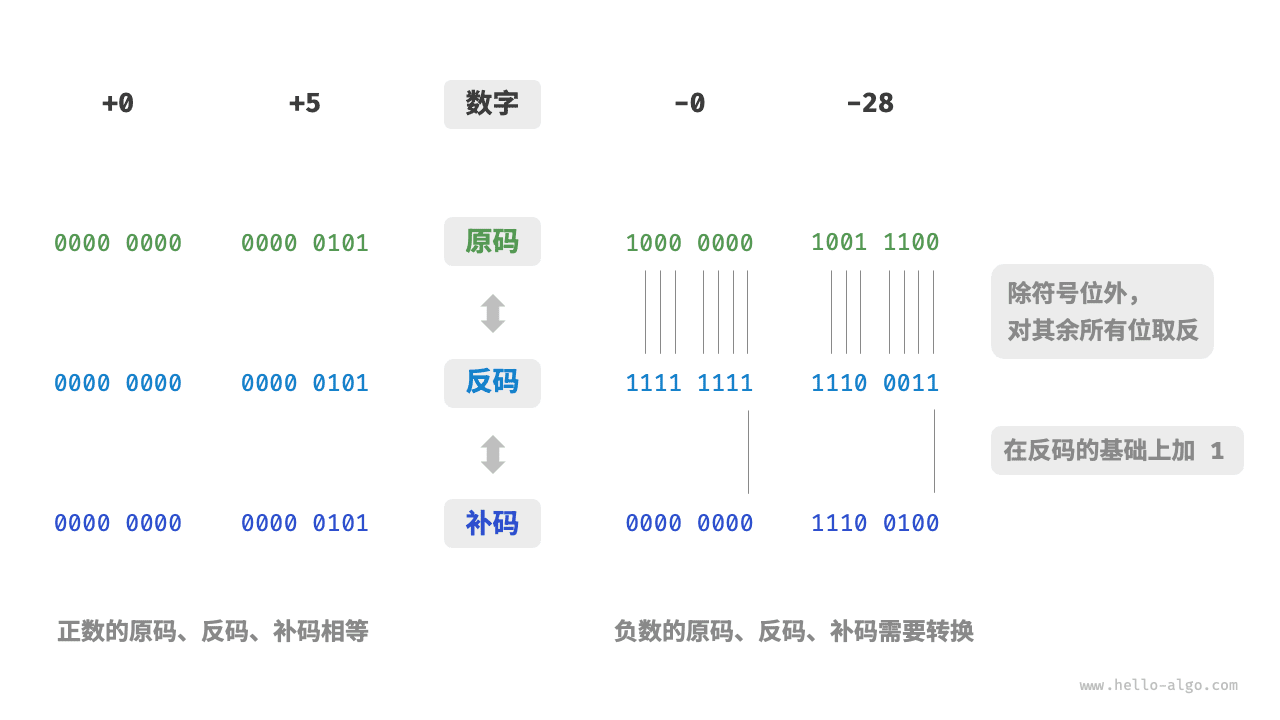

#### 原码(sign-magnitude)

原码的问题在于负数的原码不能直接用于运算
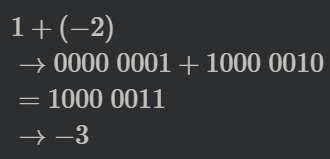

#### 反码(1's complement)

反码解决了无法计算的问题, 但存在 正负零 问题.  
正负零带来的问题有二:
1. 歧义
2. 低效

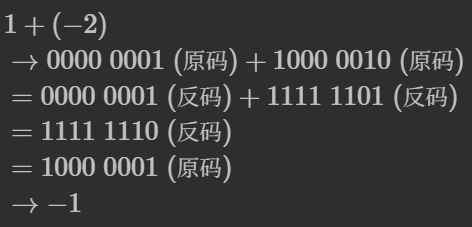

#### 补码(2's complement)

在 -0 的基础上加1会导致进位溢出, 因此正负零歧义得以解决  
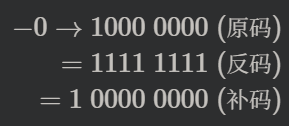

需要注意的是 补码 1000 0000 是个例外, 其原码与补码相同.  
因此计算机规定该补码代表 -128  
实际上 -1 + (-127) 在补码下计算的结果就是 -128  
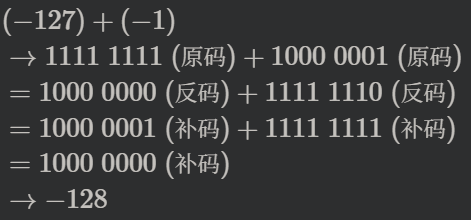

补码暗示了一个事实, 计算机内部硬件主要是基于加法运算设计的.  
与其他运算相比, 其硬件实现更简单, 且更易并行化处理.  
但是将加法运算与基本逻辑运算结合便可完成其他各种数学运算.  

## 浮点数编码

记录一个 32bit(4byte) 二进制数为:  
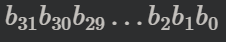

根据 IEEE 754 标准, 32-bit float 由三部分构成:
1. 符号位S: 占1位, 31号
2. 指数位E: 占8位, 30~23号
3. 分数位N: 23位, 22~0号

对应公式如下:  
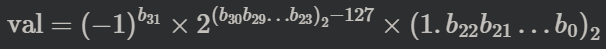
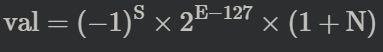

各项取值如下:  
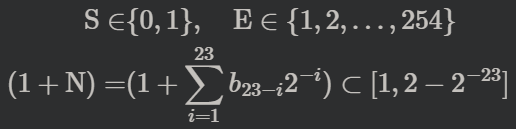

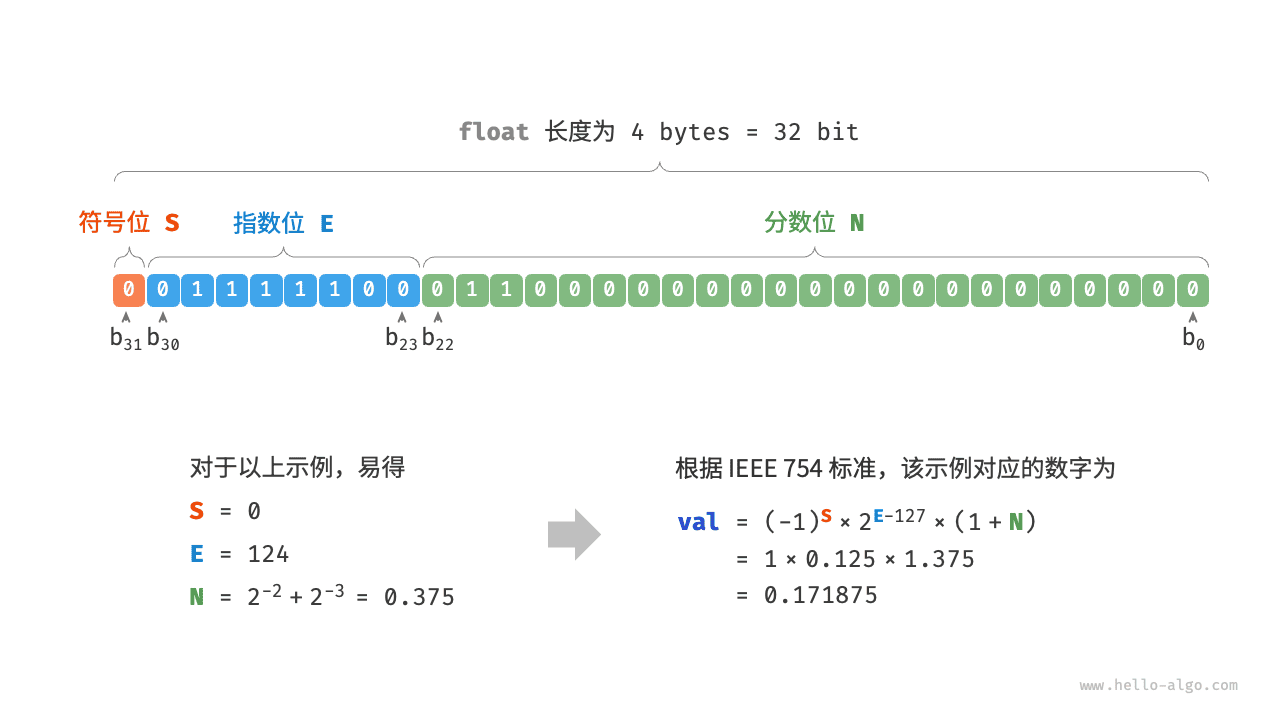

float 拓展了范围, 但牺牲了精度. 由于指数位的存在, float越大, 相邻两个数字之间的差值就越大.

注: 隐含的1是由于二进制数只有 0 和 1 两种表示, 因此留1占位.  
但这样会导致 0 需要特殊表达

指数位 E = 0 和 E = 255 有特殊含义

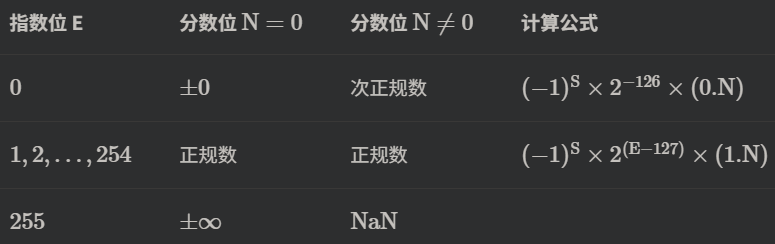

## 字符编码

### ASCII

American Standard Code for Inoformation Interchange, ASCII  
使用 7-bit(低位) 表示一个字符, 最多能表示128个不同字符  
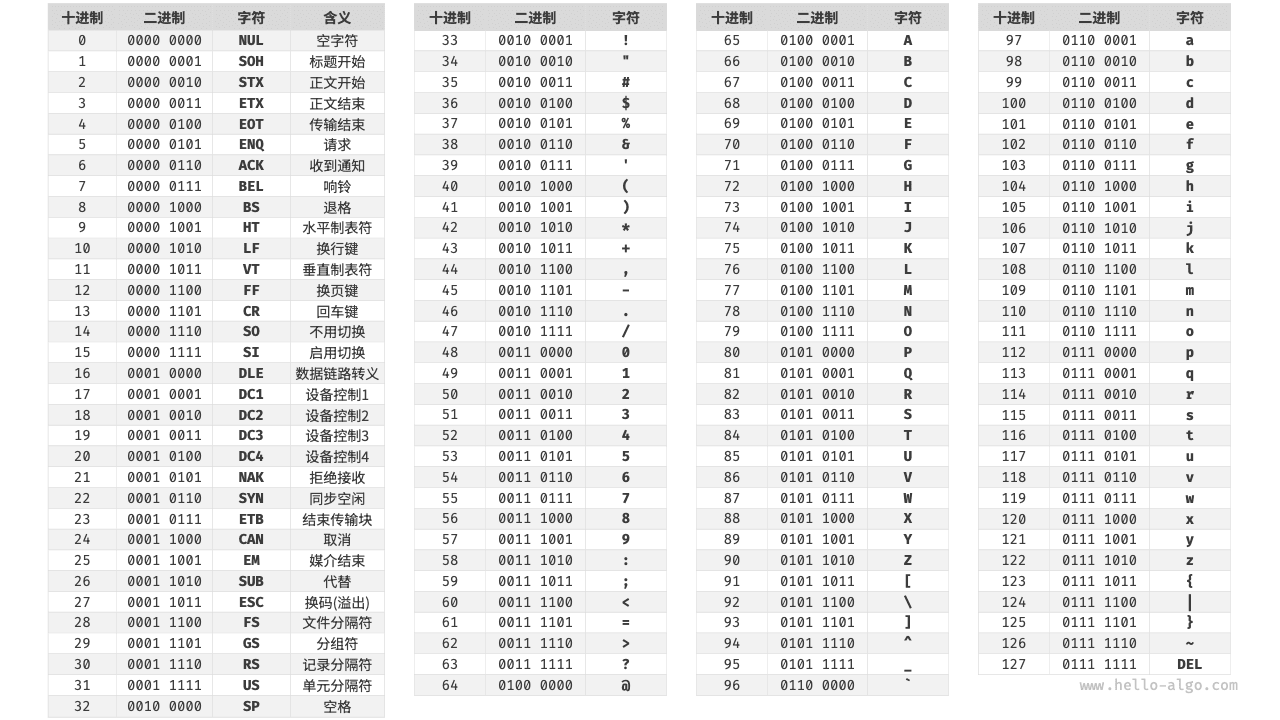

### EASCII

Extended ASCII  
在 ASCII 的基础上拓展到 8-bit, 能够表示256个字符  
在世界范围内, 有很多种适应不同地区的 EASCII 字符集  
其前 128 字符统一为 ASCII 码, 后 128 个字符则各不相同

### GBK

随着计算机的发展, 中国国家标准总局于1980年发表了 GB2412 字符集.  
GB2312 收录了6763个汉字, 满足了当时的基本使用.  
然而 GB2312 无法处理部分罕见字和繁体字.  

GBK(Kuo, 扩展) 则是在 GB2312 的基础上得到的, 共收录 21886 个汉字.  
GBK 方案中, ASCII字符使用1个字节, 汉字使用两个字节.

GB18030 则是更新的标准, 支持少数民族文字, 但由于 UTF-8 的出现, 也就没啥用了

### Unicode

Unicode 于1991年发布, 其致力于构建全球统一字符集标准.  
其理论上限约100万个字符. 截至2022年9月, 其已包含149186个字符.  

其本质是为每个字符分配一个编号(码点), 但其并未规定在计算机中如何存储这些码点.  

例: U+4E2D(十进制20013)

### UTF-8

UTF-8 是是一种可变长度编码, 使用1~4字节来表示一个字符.  
ASCII字符 -> 1字节, 拉丁/希腊字母 -> 2字节, 常见中文 -> 3字节, 生僻字 -> 4字节  

编码规则:
1. 对于长度为1字节的字符, 高位置0, 其余为 Unicode 码点(完全兼容ASCII)
2. 对于长度为n字节的字符(n > 1), 首字节高n位都置1, 第 n+1 位置0. 从第2个字节开始, 将每个字节的高2位都置为10, 其余所有位用于填充 Unicode 码点.

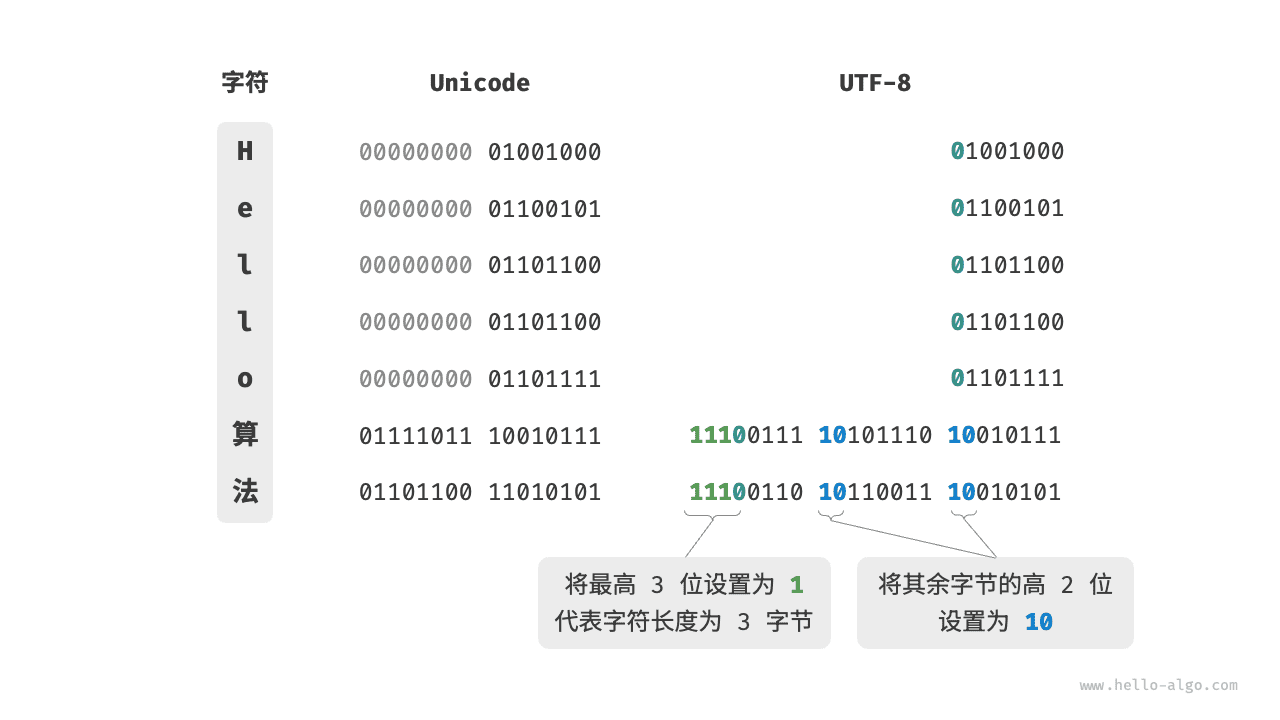

除 UTF-8 外, 还有两种编码:
1. UTF-16: 使用2/4字节来表示一个字符. 所有ASCII字符和常用非英文字符, 都使用2字节; 少数字符使用4字节. 对于2字节字符, UTF-16编码与Unicode码点相等.
2. UTF-32: 每个字符都是以4字节

从空间占用来看, UTF-8 表示英文更高效(1byte); UTF-16 表示某些非英文字符更高效, 如中文, 其只需要2byte, UTF-8 则可能需要3byte.

UTF-16 的字符范围划分:  
0x0000 ~ 0xD7FF     →  2 字节字符（直接存储）  
0xD800 ~ 0xDBFF     →  4 字节字符的"前半部分"（高代理）  
0xDC00 ~ 0xDFFF     →  4 字节字符的"后半部分"（低代理）  
0xE000 ~ 0xFFFF     →  2 字节字符（直接存储）  

范围:  
2 字节能覆盖：0xD7FF + (0xFFFF - 0xDFFF) = 55295 + 8192 = 63487 个字符  
4 字节（代理对）能覆盖：(0xDBFF - 0xD800 + 1) × (0xDFFF - 0xDC00 + 1) = 1024 × 1024 = 1048576 个字符 

注: UTF-16 中的 2 字节 = Unicode 码点，仅当 Unicode 码点不在禁区 0xD800~0xDFFF 时成立  
注: 基本多文本平面(BMP)是整个 0x0000 ~ 0xFFFF，但其中 0xD800 ~ 0xDFFF 这 2048 个位置没有分配任何字符

## 编程语言的字符编码

等长编码与变长编码相比有以下优势:
1. 更快的随机访问
2. 更快的字符计数
3. 更快的字符串操作(分割, 连接, 插入, 删除等)

对于等长编码该操作都是O(1), 对于变长编码则是O(n)
因此, 大多数编程语言都使用 UTF-16 或 UTF-32 这类"等长"编码

注: Unicode 1.0(1991) 规范声称 16-bit 足以表示所有字符, 因此 UTF-16 是被当作等长编码设计的, 但随着 Unicode 规范不断更新, UTF-16 现在已经成为变长编码了  

2001年3月, Unicode 3.1发布, 首次有了超出原始的16位编码范围.

由于以上原因, Java, JavaScript(TS作为其超集完全继承了其处理方式), C# 等早期语言则都使用 UTF-16 编码来处理字符串, 以获得更好的效率. 但由于字符集的拓展, 一旦涉及4字节字符, 其操作结果就会出现些问题. 如 4byte 的 emoji 如果取 length 的话会得到2.

Python3, Go, Rust 等新生语言则提出了不同的编码方案:
1. Python: 其 str 使用 Unicode 编码, 并使用一种更为灵活的编码方式. 其以占用空间最大字符的大小为单位尺寸(ASCII -> 1byte, BMP -> 2byte, Other -> 4byte).
2. Go: string 类型内部使用 UTF-8. rune(4byte) 类型, 用于表示单个 Unicode 码点
3. Rust: str, String 使用 UTF-8. char(4byte) 类型, 用于表示单个 Unicode 码点

注: 在文件存储或网络传输中为了空间利用率和兼用性通常采用 UTF-8 编码

### 补充

静态数据结构: 基于数组实现的数据结构, 其容量固定(自动扩容是自动扩容)  

原码 -> 补码: 取反加1  
补码 -> 原码(2种): 
1. 减1取反
2. 取反加1

为什么 补码 -> 原码 也可以使用 取反加1?  
实际上, 原码和补码的相互转换时计算"补数"的过程.  

补数:  
1. 若 a + b = c
2. 则 a 是 b 到 c 的补数
3. 则 b 是 a 到 c 的补数

而当类型为 n-bit 时, 补码 + 原码 = 10000xxxx(n个0)
即, 补码和原码互为补数, 而取反加1则是求补数的过程.

以 4-bit 为例:
原码 0001 -> 补码 1111
0001 + 1111 = 1 0000

# 数组与链表